In [1]:
from bibli_functions import *

### Read in csv file
One line per article per author. <br>
To format Sopus data this way, you can use scopus_data_functions.py

In [2]:
author_data = pd.read_csv('data/author_data_test.csv')
author_data[:4]

,Unnamed: 0,AU-ID,source_id,EID,Year,Affiliation Country,Document Type,SubType,subject fields,citedby-count,ISSN,authors,authors2
0,1,7003822985,2.110083e+10,2-s2.0-85101814199,2021,"Japan,China",Article,Journal,PHYS,2,23973366,7003822985;57209772271;7102242595;7405449744;5...,NaN
1,2,7003822985,2.915000e+04,2-s2.0-85104382294,2021,"Japan,China",Article,Journal,PHYS,3,10797114 00319007,7003822985;57209772271;7102242595;7405449744;5...,NaN
2,3,7003822985,2.110025e+10,2-s2.0-85086235883,2019,"Japan,China",Conference Paper,Conference Proceeding,MULT,0,18248039,7003822985;57209772271;7102242595;7405449744;5...,NaN
3,4,7003822985,2.110025e+10,2-s2.0-85086230025,2019,"Japan,China",Conference Paper,Conference Proceeding,MULT,0,18248039,7003822985;57209772271;7102242595;7405449744;5...,NaN


### First, some basic stats

Averange h-index:  41.5
Standard deviation: 22.27


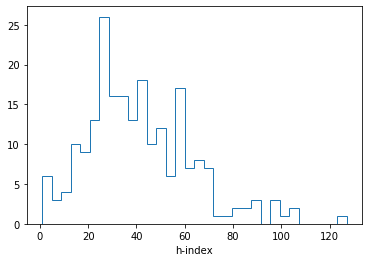

In [3]:
get_h_index(author_data)

Averange Number of papers per author:  149.6
Standard deviation: 121.97


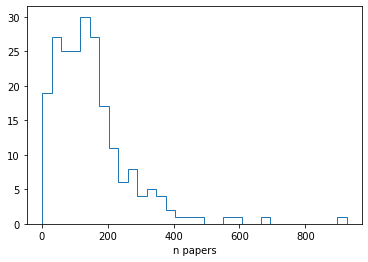

In [4]:
n_papers_per_author(author_data)

Averange Number of authors per paper:  64.7
Standard deviation: 81.92


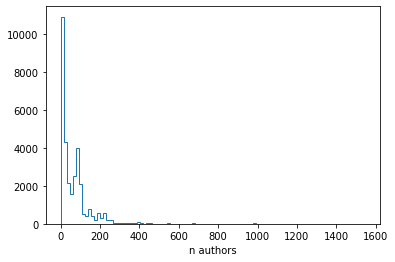

In [5]:
n_authors(author_data)

Averange last year published:  2017.1
Standard deviation: 4.93


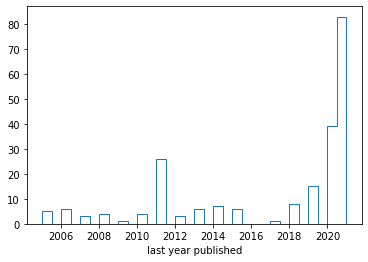

In [6]:
get_last_year_published(author_data)

### Now let's look at some temporal stats
First, we'll aggregate the average of several metrics by year.

In [7]:
# adding some useful columns
author_data['first author'] = [int(b.split(';')[0].strip()) for b in author_data['authors']]
author_data['n authors'] = [len(a.split(';')) for a in author_data['authors']]

# Add column for n years after first paper
author_data['Career Year'] = -1

for a in set(author_data['AU-ID']):
    papersi = (author_data['AU-ID']==a)
    y0 = np.min(author_data['Year'][papersi])
    author_data['Career Year'][papersi] = np.asarray(author_data['Year'][papersi])-y0

C:\Users\Claire\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


Creating aggregated stats, both as a function of calendar year and year after an author's first publication

In [8]:
save_path='data/author_data_test_aggregate.csv'
aggregate_data(author_data, save_path=save_path)

aggregate data saved to  data/author_data_test_aggregate.csv


In [9]:
save_path1 ='data/author_data_test_aggregate_careeryear.csv'
aggregate_data(author_data, save_path=save_path1, years=np.arange(0, 26, 1), ytype='Career Year')

aggregate data saved to  data/author_data_test_aggregate_careeryear.csv


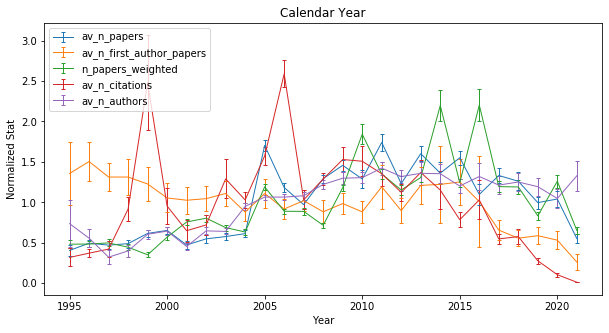

In [10]:
fig = plt.figure(facecolor='w', figsize=(10,5))
plt.title('Calendar Year')
plot_aggregate_data(save_path, 'av_n_papers', normed=True)
plot_aggregate_data(save_path, 'av_n_first_author_papers', normed=True)
plot_aggregate_data(save_path, 'n_papers_weighted', normed=True)
plot_aggregate_data(save_path, 'av_n_citations', normed=True)
plot_aggregate_data(save_path, 'av_n_authors', normed=True)
plt.legend();

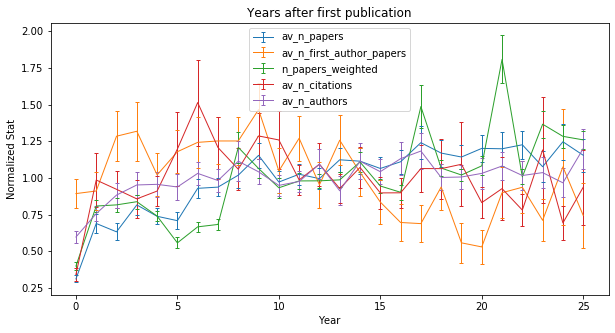

In [11]:
fig = plt.figure(facecolor='w', figsize=(10,5))
plt.title('Years after first publication')
plot_aggregate_data(save_path1, 'av_n_papers', normed=True)
plot_aggregate_data(save_path1, 'av_n_first_author_papers', normed=True)
plot_aggregate_data(save_path1, 'n_papers_weighted', normed=True)
plot_aggregate_data(save_path1, 'av_n_citations', normed=True)
plot_aggregate_data(save_path1, 'av_n_authors', normed=True)
plt.legend();